<a href="https://colab.research.google.com/github/JosuePerezValenzuela/Classification/blob/master/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classification

La clasificacion es usado para separar puntos de datos en diferentes clases, en este ejercicio se usara el TensorFlow estimator para clasificar flores

In [ ]:
#Importaciones
!pip install tensorflow==2.15.0
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import pandas as pd

#Conjunto de datos

El conjunto de datos separa las florews en 3 diferentes clases de especies


*   Setosa
*   Versicolor
*   Virginica

La informacion sobre cada flor es:

* Largo del sepalo
* Ancho del sepalo
* Largo del petalo
* Ancho del petalo



In [ ]:
CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
#             0           1             2
#Con las transformaciones
SPECIES = ['Setosa', 'Versicolor', 'Virginica']
#Estas solo son definiciones que ayudaran despues, tiene el nombre de las columnas y las especies

In [ ]:
train_path = tf.keras.utils.get_file(
    "iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_path = tf.keras.utils.get_file(
    "iris_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

#header = 0 indica que la primera fila es la cabecera
train = pd.read_csv(train_path, names=CSV_COLUMN_NAMES, header=0)
test = pd.read_csv(test_path, names=CSV_COLUMN_NAMES, header=0)

In [ ]:
train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [ ]:
#Sacaremos la columna Species ya que las que queremos clasificar
train_y = train.pop('Species')
test_y = test.pop('Species')
train.head() #Solo queda la informacion de las flores

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,6.4,2.8,5.6,2.2
1,5.0,2.3,3.3,1.0
2,4.9,2.5,4.5,1.7
3,4.9,3.1,1.5,0.1
4,5.7,3.8,1.7,0.3


#Funcion de entrada



In [ ]:
def input_fun(features, labels, training=True, batch_size=256):
  #Convertimos los datos en un dataset de tensorflow

  #A este conversor le debemos pasar tanto la lista que tiene los datos y opcionalmente la lista que tiene la resp "labels"
  dataset = tf.data.Dataset.from_tensor_slices((features.values, labels))

  if training:
    dataset = dataset.shuffle(1000).repeat()

  #dataset ya es nuestro conjunto de datos en un dataset de tensorflow
  #.batch es un metodo el cual agrupa los datos segun el tamaño de "batch_size"
  return dataset.batch(batch_size)

#Feature columns

La transformacion de los datos a numericos

In [ ]:
#En este caso como todos son numericos solo se hace
feature_column = []
#train.keys() devuelve las cabeceras que tiene la lista train
for key in train.keys():
  input_layer = tf.keras.layers.Input(shape = (len(train.keys()),), dtype=tf.float32)


#Construccion del modelo

Debemos elegir un modelo. Para la tarea de classificacion hay una variedad diferente de modelos que ponemos elegi dos de esos son:

* DNNClassifier (Deep neuronal network)
* LinearClassifier

Usaremos DNNC

In [ ]:
#Construccion del modelo

model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation='relu', input_shape=(4,)),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(3)
])

In [ ]:
#Entrenamiento

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(input_fun(train, train_y, training=True), epochs=20, steps_per_epoch=100,
          validation_data=input_fun(test, test_y, training=False))

Epoch 1/20
100/100 [==============================] - 1s 3ms/step - loss: 1.0117 - accuracy: 0.5805 - val_loss: 0.7238 - val_accuracy: 0.9333
Epoch 2/20
100/100 [==============================] - 0s 2ms/step - loss: 0.5066 - accuracy: 0.9332 - val_loss: 0.4301 - val_accuracy: 0.9333
Epoch 3/20
100/100 [==============================] - 0s 3ms/step - loss: 0.2857 - accuracy: 0.9700 - val_loss: 0.2420 - val_accuracy: 0.9333
Epoch 4/20
100/100 [==============================] - 0s 2ms/step - loss: 0.1741 - accuracy: 0.9750 - val_loss: 0.1491 - val_accuracy: 1.0000
Epoch 5/20
100/100 [==============================] - 0s 3ms/step - loss: 0.1217 - accuracy: 0.9750 - val_loss: 0.1062 - val_accuracy: 1.0000
Epoch 6/20
100/100 [==============================] - 0s 4ms/step - loss: 0.0961 - accuracy: 0.9776 - val_loss: 0.0839 - val_accuracy: 1.0000
Epoch 7/20
100/100 [==============================] - 0s 4ms/step - loss: 0.0822 - accuracy: 0.9833 - val_loss: 0.0718 - val_accuracy: 1.0000
Epoch 

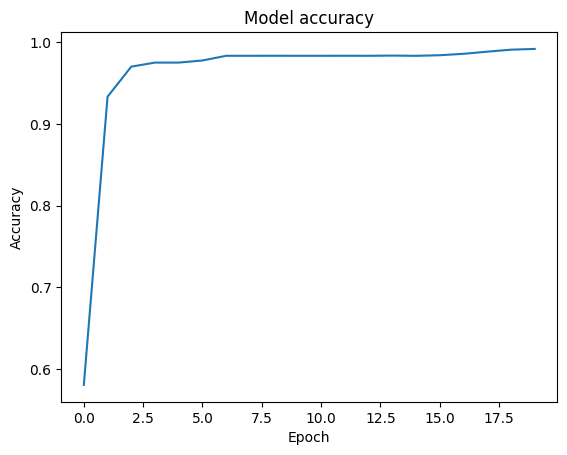

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [ ]:
#Prediccion con nuevos datos

new_data = pd.DataFrame({
    'SepalLength': [5.1, 6.2, 7.3],
    'SepalWidth': [3.5, 2.9, 3.7],
    'PetalLength': [1.4, 4.3, 6.5],
    'PetalWidth': [0.2, 1.3, 2.0]
})

prediction_data = new_data[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']].values
print(prediction_data)
predictions = model.predict(prediction_data)

predicted_classes = [SPECIES[tf.argmax(prediction).numpy()] for prediction in predictions]

[[5.1 3.5 1.4 0.2]
 [6.2 2.9 4.3 1.3]
 [7.3 3.7 6.5 2. ]]
1/1 [==============================] - 0s 21ms/step


In [ ]:
print(predicted_classes)

['Setosa', 'Versicolor', 'Virginica']
